<a href="https://colab.research.google.com/github/gptix/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Jud%20Taylor%20-%20Assignment_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# import code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare, stats
import random
# mean, sigma = np.mean(a), np.std(a)

In [42]:
# import data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-06 15:23:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-11-06 15:23:26 (289 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [43]:
# clean data

# Add column headers. Replace "?" with "NaN".
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

# convert yes/no to numeric (no=0)
df = df.replace({'y': 1, 'n': 0})

df.head()

# split df into one for Republicans nd one for Democrats
republican = df[df['party']=='republican']
democrat = df[df['party']=='democrat']

r_mx_data = republican['mx-missile'].dropna()

r_mx_data

0      0.0
1      0.0
7      0.0
8      0.0
10     0.0
      ... 
420    0.0
427    0.0
430    1.0
432    0.0
434    0.0
Name: mx-missile, Length: 165, dtype: float64

## Generate and numerically represent a confidence interval

In [0]:
take = 50

sample = r_mx_data.sample(take)

# sample

# def set_of_sets_of_samples(data, sample_count, set_count):
#   rslt = []
#   for x in range(set_count):
#     rslt.append(data.sample(sample_count))
#   return(rslt)  

# set_of_samples = set_of_sets_of_samples(r_mx_data, 50, take)

# set_of_samples

In [0]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean - moe, mean, mean + moe)

  # return data

In [46]:
confidence_interval(r_mx_data)

(0.06593485907282265, 0.11515151515151516, 0.16436817123020767)

## Graphically (with a plot) represent the confidence interval

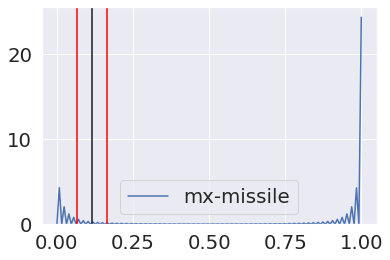

In [47]:
import seaborn as sns

sns.kdeplot(r_mx_data)
conf_low, mean, conf_high = confidence_interval(r_mx_data)
plt.axvline(x=conf_low, color='red')
plt.axvline(x=conf_high, color='red')
plt.axvline(x=mean, color='k');

## Interpret the confidence interval - what does it tell you about the data and its distribution?

It looks to me like the null hypothesis (that there is no correlation between being an R and particularly supporting/opposing the mx-missile bill) is not supported.

I conclude that the null hypothesis **should be rejected**.

## Chi-squared tests:

Take a dataset that we have used in the past in class that has categorical variables. 

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

In [0]:
# Make education variable with fewer buckets
df['edubucket'] = df['education']
collegeplus = [' Bachelors', ' Masters', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Doctorate', ' Prof-school']
df["edubucket"] = np.where(df['edubucket'].isin(collegeplus), "CollegePlus", df['edubucket'])

lt_hs = [' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']
df["edubucket"] = np.where(df['edubucket'].isin(lt_hs), "LT-HS", df['edubucket'])
# df.columns
# print(df.shape)
# df.head()

In [50]:
df['edubucket'].unique()

array(['CollegePlus', ' HS-grad', 'LT-HS'], dtype=object)

In [51]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [52]:
df['marriagebucket'] = df['marital-status']
married_not_divorced = [' Married-civ-spouse',' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
df["marriagebucket"] = np.where(df['marriagebucket'].isin(married_not_divorced), "Married Not Divorced", df['marriagebucket'])

df['marriagebucket'].unique()

array([' Never-married', 'Married Not Divorced', ' Divorced'],
      dtype=object)

Pick two of those categorical variables

*   edubucket
*   marriagebucket



 and run a chi-squared tests on that data


*   By hand using Numpy

In [66]:
contingency_table = pd.crosstab(df['edubucket'], df['marriagebucket'], margins=True)

contingency_table

marriagebucket,Divorced,Never-married,Married Not Divorced,All
edubucket,,,,
HS-grad,1613,3089,5799,10501
CollegePlus,2373,5997,9437,17807
LT-HS,457,1597,2199,4253
All,4443,10683,17435,32561


In [72]:
# Grab the crosstab cells that correspond to HS-grad
m_for_e_hs = contingency_table.iloc[0].values[0:3]
m_for_e_hs

array([1613, 3089, 5799])

In [69]:
# Grab the crosstab cells that correspond to CollegePlus
m_for_e_cp = contingency_table.iloc[1].values[0:3]
m_for_e_cp

array([2373, 5997, 9437])

In [70]:
# Grab the crosstab cells that correspond to LT-HS	
m_for_e_lths = contingency_table.iloc[2].values[0:3]
m_for_e_lths

array([ 457, 1597, 2199])

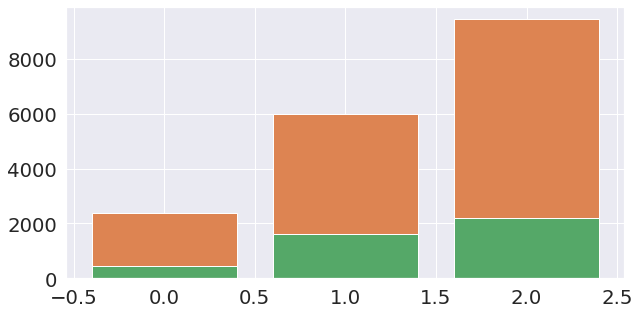

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# In this bar chart we can eyeball the dependence between these two variables
# If these two variables were independent, we would expect the proportions of 
# red and blue to be consistent throughout the bars. This is not what we see.
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
N = len(marital_status_count)

ind = np.arange(N)    # the x locations for the groups

p1 = plt.bar(ind, m_for_e_hs)
p2 = plt.bar(ind, m_for_e_cp)
p3 = plt.bar(ind, m_for_e_lths)

# # plt.show()


*   In a single line using Scipy

In [0]:
from scipy import stats

observed = pd.crosstab(df['edubucket'], df['marriagebucket'])

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
# Assume that the voting data is already loaded as 'df'.
# Assume that confidence=0.95. 
# Assume that issues is defined. 

# Parameters: 
#   Party - 'republican' or 'democrat'
#   Issue - one of issues
#   
# Improvements: 
# parameterize df
#  - clean
# build header list from df 
#  - need name of header strings
# parameterize code to filter df on val of a column
#  - Raise error if filter column has fewer than two values
# parameterize confidence
#  - handle no value specified
# figure how to return plot as data object/pointer

def analyze_issue(party, issue, ):
  if (party == 'republican'):
    data = df[df['party']=='republican']
  else:
    data = df[df['party']=='democrat']
  
  if (not(issue in ['handicapped-infants','water-project', 'budget',
                    'physician-fee-freeze', 'el-salvador-aid', 
                    'religious-groups','anti-satellite-ban', 'aid-to-contras',
                    'mx-missile','immigration','synfuels', 'education', 
                    'right-to-sue','crime','duty-free', 'south-africa'])):
    return error()
  else:
    data = data[issue].dropna()

  CI = confidence_interval(data)

  sns.kdeplot(data)
  conf_low, mean, conf_high = CI
  plt.axvline(x=conf_low, color='red')
  plt.axvline(x=conf_high, color='red')
  plt.axvline(x=mean, color='k');  

  return CI

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)